# **Case Study 5**
## Firewall Rule Actions Classification
  
  
---


# Team DEAN:
#### **D**avid Wei | **E**dward Roske | **A**dam Canton | **N**eil Benson

# **Business Understanding**
*   **Problem**: 
*   **Objective**: 
*   **Why is this important?**: 

In [ ]:
# sys
import os
from os.path import isfile
from inspect import CO_VARARGS
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")  # ignoring warnings

# SKLearn
from sklearn.model_selection import StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFECV
from sklearn import metrics
from sklearn.pipeline import Pipeline

#NLTK & NLP
import nltk
from urllib import request
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import ToktokTokenizer
from string import punctuation
from nltk.stem import PorterStemmer

# Other Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from pandas_profiling import ProfileReport
from os import listdir, walk
from os.path import isfile, join
import re
import string
from itertools import groupby
import seaborn as sns
import email #library for managing email messages
from tqdm import tqdm #for progress bar
import missingno as msno
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
df = pd.read_csv("log2.csv")

# EDA

In [ ]:
df.head(5)

Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
4  allow  25358        6778           18580       31                  16   

   pkts_sent  pkts_received  
0          1              1  
1         10              9  
2          1              1  
3          8              7  
4         13             18

In [ ]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [ ]:
df.describe()

Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
count  65532.000000      65532.000000     65532.000000          65532.000000   
mean   49391.969343      10577.385812     19282.972761           2671.049930   
std    15255.712537      18466.027039     21970.689669           9739.162278   
min        0.000000          0.000000         0.000000              0.000000   
25%    49183.000000         80.000000         0.000000              0.000000   
50%    53776.500000        445.000000      8820.500000             53.000000   
75%    58638.000000      15000.000000     38366.250000            443.000000   
max    65534.000000      65535.000000     65535.000000          65535.000000   

              Bytes    Bytes Sent  Bytes Received       Packets  \
count  6.553200e+04  6.553200e+04    6.553200e+04  6.553200e+04   
mean   9.712395e+04  2.238580e+04    7.473815e+04  1.028660e+02   
std    5.618439e+06  3.828139e+06    2.463208e+06  5.133002e+03   
min    6.000000e+01  6.000000e+01    0.000000e+00  1.000000e+00   
25%    6.600000e+01  6.600000e+01    0.000000e+00  1.000000e+00   
50%    1.680000e+02  9.000000e+01    7.900000e+01  2.000000e+00   
75%    7.522500e+02  2.100000e+02    4.490000e+02  6.000000e+00   
max    1.269359e+09  9.484772e+08    3.208818e+08  1.036116e+06   

       Elapsed Time (sec)      pkts_sent  pkts_received  
count        65532.000000   65532.000000   65532.000000  
mean            65.833577      41.399530      61.466505  
std            302.461762    3218.871288    2223.332271  
min              0.000000       1.000000       0.000000  
25%              0.000000       1.000000       0.000000  
50%             15.000000       1.000000       1.000000  
75%             30.000000       3.000000       2.000000  
max          10824.000000  747520.000000  327208.000000

In [ ]:
# gets only unique value count of columns with less than 10 unique values
def get_unq_col(df):
    for i in df.columns:
        val = df[i]
        if len(val.unique()) <= 10:
            print('='*80)
            print('Column Name: '+val.name)
            print(val.value_counts(normalize=False))
            print('='*80)
        else: 
            print('Column Name: '+val.name)
            print('# of unique values: '+str(len(set(val))))
            print('-'*80)

get_unq_col(df)

Column Name: Source Port
# of unique values: 22724
--------------------------------------------------------------------------------
Column Name: Destination Port
# of unique values: 3273
--------------------------------------------------------------------------------
Column Name: NAT Source Port
# of unique values: 29152
--------------------------------------------------------------------------------
Column Name: NAT Destination Port
# of unique values: 2533
--------------------------------------------------------------------------------
Column Name: Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64
Column Name: Bytes
# of unique values: 10724
--------------------------------------------------------------------------------
Column Name: Bytes Sent
# of unique values: 6683
--------------------------------------------------------------------------------
Column Name: Bytes Received
# of unique values: 8814
--------------------

### Mapping Custom Response Variable 

2


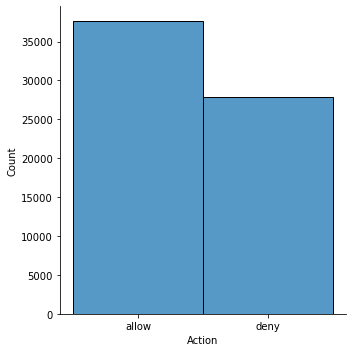

In [ ]:
# mapping custom response class
df['Action'] = df['Action'].replace(['drop', 'reset-both'], 'deny')
print(len(set(df['Action'])))

sns.displot(df, x="Action")

### Testing if 'Bytes' = ('Bytes_Sent' + 'Bytes_Received')
We can see that from a quick summing of both our sent and received byte attributes, it equals the 'bytes' amount attribute.

In [ ]:
if df['Bytes'].sum() == (df['Bytes Sent'].sum() + df['Bytes Received'].sum()):
    print('Bytes = Bytes_Sent + Bytes_Received?: '+str(True))
else: print('Bytes = Bytes_Sent + Bytes_Received?: '+str(False))

Bytes = Bytes_Sent + Bytes_Received?: True


### Testing if 'Packets' = ('pkts_sent' + 'pkts_received')
We can see that from a quick summing of both our sent and received packets attributes, it equals the 'Packets' amount attribute.

In [ ]:
if df['Packets'].sum() == (df['pkts_sent'].sum() + df['pkts_received'].sum()):
    print('Packets = pkts_sent + pkts_received?: '+str(True))
else: print('Packets = pkts_sent + pkts_received?: '+str(False))

Packets = pkts_sent + pkts_received?: True


### Density Distribution Plots

Text(0.5, 6.79999999999999, 'Packets')

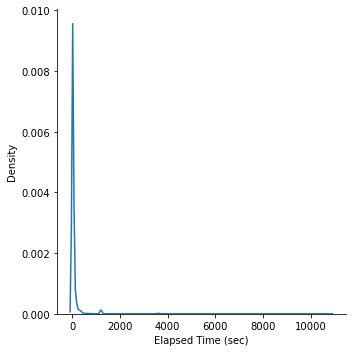

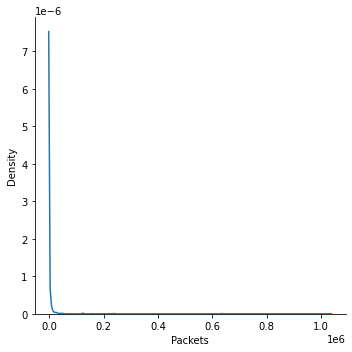

In [ ]:
# 'Elapsed Time (sec)'
sns.displot(df, x='Elapsed Time (sec)',kind='kde')
plt.xlabel('Elapsed Time (sec)')

# 'Bytes'
sns.displot(df, x='Bytes',kind='kde')
plt.xlabel('Bytes')

# 'Packets'
sns.displot(df, x='Packets',kind='kde')
plt.xlabel('Packets')

### Visualizing Outliers

<AxesSubplot:xlabel='Packets'>

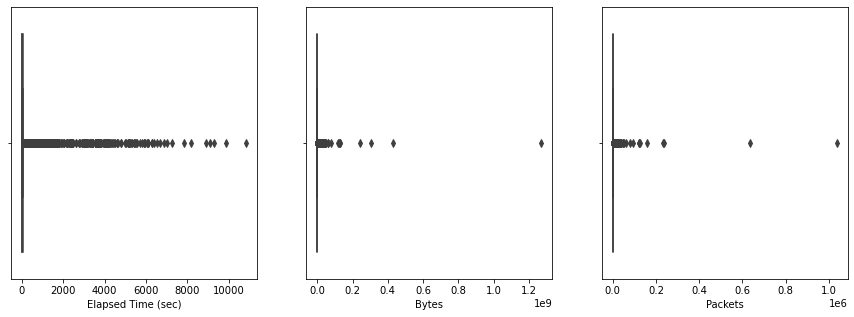

In [ ]:
# call regplot on each axes
fig, ax = plt.subplots(ncols=3, sharey=True,figsize=(15,5))
sns.boxplot(df['Elapsed Time (sec)'],ax=ax[0])
sns.boxplot(df['Bytes'],ax=ax[1])
sns.boxplot(df['Packets'],ax=ax[2])

### Visualizing attribute Correlations
We can observe that from our earlier analysis of checking if the sent and received attributes equal to the 'total' is significant is important because as demonstrated in the first correlation heat max, the correlations between the totals and the sent/received attributes for both 'Bytes' and 'Packets' are very high (corr > .9). However, after removing we can see that interestingly, the correlation between the total 'Packets' and total 'Bytes' is still very high (corr = .97). This is because the bytes is a property of the packet, however, for our analysis, we keep them both.

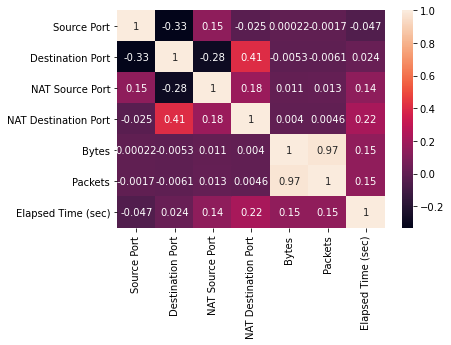

In [ ]:
corrMatrix = df[df.columns[~df.columns.isin(['Action'])]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

corrMatrix = df[df.columns[~df.columns.isin(['Action', 'Bytes Sent', 'Bytes Received', 'pkts_sent', 'pkts_received'])]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Data Cleaning

## Checking for Empty Data

In [ ]:
msno.matrix(df)

<AxesSubplot:>

## Checking for Duplicates

In [ ]:
def remove_dups(df, y):
    def check_fullrow_dups(df):
        dups = df.loc[:, df.columns != y].duplicated().sum()
        perc_duplicate = dups/len(df)*100
        return perc_duplicate
        #f"{dups/len(df)*100:1.2f}% of all records are considered duplicates"
        # source:
        # adapted from: https://stackoverflow.com/questions/35584085/how-to-count-duplicate-rows-in-pandas-dataframe

    if check_fullrow_dups(df) != 0:
        duplicated_rows = df[df.duplicated()]
        print(f"{check_fullrow_dups(df)}% of all records are considered duplicates")
        print('\n')
        df_dupes_removed = df.drop_duplicates(keep=False, inplace=False)
        print('# of duplicates removed: '+str(len(duplicated_rows)))
        print('\n')
        print('Response Class Duplicates: \n'+str(pd.value_counts(duplicated_rows.Action)))
        print('\n')
    else: 
        pass

    return df_dupes_removed

df = remove_dups(df, 'Action')
print('# of records remaining: '+str(len(df)))

12.77391198193249% of all records are considered duplicates


# of duplicates removed: 8370


Response Class Duplicates: 
deny     8169
allow     201
Name: Action, dtype: int64


# of records remaining: 52235


## Removing Strong Outlier Data
As seen in our earlier visualizations of the outlier data, both the total 'Bytes' and total 'Packets' having

**Keeping only the 95% quartile**: <br>
- No. of outlier records removed: 4108<br>
- No. of records remaining: 48127<br>
- Boxplots:

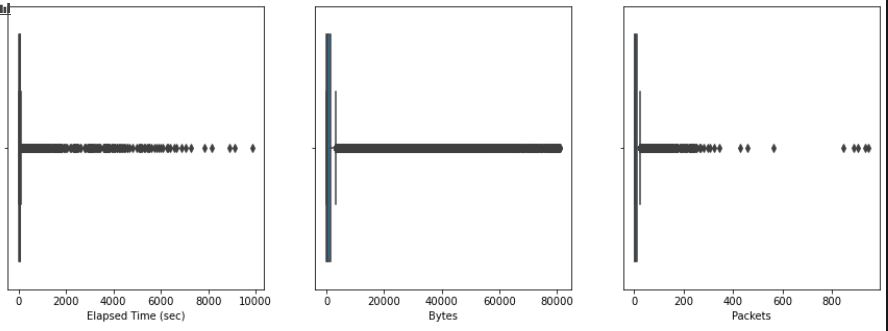


**Keeping only the 90% quartile**: <br>
- No. of outlier records removed: 5316
- No. of records remaining: 46919

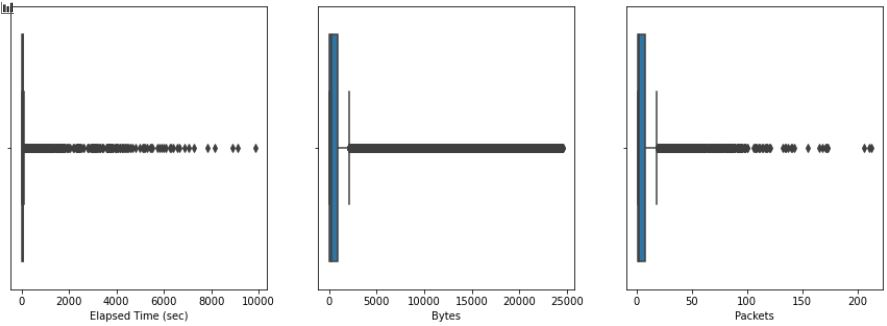


In [ ]:
def drop_outliers(df, field_name):
    iqr = 1.5*(np.percentile(df[field_name], 90) - np.percentile(df[field_name], 10))
    # df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 90))].index, inplace=True) 
    # df.drop(df[df[field_name] < (iqr + np.percentile(df[field_name], 10) - iqr)].index, inplace=True)
    df_outlier_removed = df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 90))].index, inplace=False) 
    df_outlier_removed = df_outlier_removed.drop(df_outlier_removed[df_outlier_removed[field_name] < (iqr + np.percentile(df_outlier_removed[field_name], 10) - iqr)].index, inplace=False)
    print('# of outlier records removed: '+str(len(df) - len(df_outlier_removed)))
    return df_outlier_removed

df = drop_outliers(df, 'Bytes')
print('# of records remaining: '+str(len(df)))

# Source: https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

# of outlier records removed: 5316
# of records remaining: 46919


In [ ]:
# fig, ax = plt.subplots(ncols=3, sharey=True,figsize=(15,5))
# sns.boxplot(df['Elapsed Time (sec)'],ax=ax[0])
# sns.boxplot(df['Bytes'],ax=ax[1])
# sns.boxplot(df['Packets'],ax=ax[2])

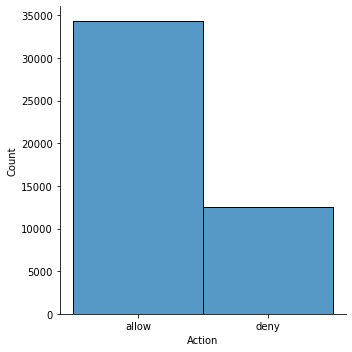

In [ ]:
sns.displot(df, x="Action")

In [ ]:
# saving dataframe to pickle to prevent running everything again
df.to_pickle('Firewall_df_protocol-4.pkl', protocol=4)
df.to_pickle('Firewall_df_protocol-5.pkl', protocol=5)

In [ ]:
python_version = sys.version.split(' ')[0]

if python_version > '3.8':
    df = pd.read_pickle("Firewall_df_protocol-5.pkl")
else: 
    df = pd.read_pickle("Firewall_df_protocol-4.pkl")

df.head(5)

Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
5        51465               443            39975                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
5  allow   3961        1595            2366       21                  16   

   pkts_sent  pkts_received  
0          1              1  
1         10              9  
2          1              1  
3          8              7  
5         12              9

# Modeling - PyCaret Baseline Models

In [ ]:
from pycaret.classification import * 

# setting up the env on entire data
classification_setup = setup(data= df, target='Action', 
                            train_size = .7, imputation_type='iterative', silent=True,verbose=False, session_id=42)

### PyCaret Comparative Models

In [ ]:
# report models
pycaret_classification_models = compare_models()
pycaret_classification_models

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

### PyCaret Baseline SVM Models

NOTE: ‘rbfsvm’ and ‘gpc’ uses non-linear kernel and hence the fit time complexity is **more than quadratic**. These estimators are hard to scale on datasets with more than 10,000 samples.
Source: https://pycaret.org/classification/

In [ ]:
# SVM (linear kernel)
svm_lr = create_model('svm', fold=10)
print('SVM (Linear) Hyperparameters: '+str(svm_lr))
# SVM (RBF kernel) - TAKES too long, 'quadratic' estimation 
# svm_rbf = create_model('rbfsvm', fold=10)

SVM (Linear) Hyperparameters: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


### SVM Baseline Model Tuned for Accuracy, AUC, Precision, F1   

In [ ]:
svm_tuned_acc = tune_model(svm_lr, optimize='Accuracy')
print(svm_tuned_acc)

SGDClassifier(alpha=0.02, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=True,
              l1_ratio=0.3800000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
svm_tuned_auc = tune_model(svm_lr, optimize='AUC')
print(svm_tuned_auc)

SGDClassifier(alpha=0.0002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=False,
              l1_ratio=0.8900000001, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=42, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
svm_tuned_recall = tune_model(svm_lr, optimize='Recall')
print(svm_tuned_recall)

SGDClassifier(alpha=0.0002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=False,
              l1_ratio=0.8900000001, learning_rate='constant', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=42, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
svm_tuned_precision = tune_model(svm_lr, optimize='Precision')
print(svm_tuned_precision)

SGDClassifier(alpha=0.02, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=True,
              l1_ratio=0.3800000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
svm_tuned_f1 = tune_model(svm_lr, optimize='F1')
print(svm_tuned_f1)

SGDClassifier(alpha=0.02, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=True,
              l1_ratio=0.3800000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


# Modeling SVM (SVC)

In [ ]:

def view_confusion_matrix(clf, X_test, y_test, y_classes):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

    # Plot non-normalized confusion matrix
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                    display_labels=y_classes,
                                    cmap=plt.cm.Blues,
                                    normalize=None,ax=ax1)
    disp.ax_.set_title('Confusion Matrix')

    # Plot normalized confusion matrix
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                    display_labels=y_classes,
                                    cmap=plt.cm.Blues,
                                    normalize='true',ax=ax2)
    disp.ax_.set_title('Normalized Confusion Matrix')

    plt.show()


def view_model_metrics(clf, X_test, y_test,y_hat, y_classes):
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print('Accuracy: %.4f'% acc )
    print("Precision: %.4f"% mt.precision_score(y_test,y_hat,pos_label='allow'))
    print("Recall: %.4f"%mt.recall_score(y_test,y_hat, pos_label='allow'))
    print("F1: %.4f"%mt.f1_score(y_test,y_hat, pos_label='allow'))
    print(view_confusion_matrix(clf, X_test, y_test, y_classes))

In [ ]:
python_version = sys.version.split(' ')[0]

if python_version > '3.8':
    df = pd.read_pickle("Firewall_df_protocol-5.pkl")
else: 
    df = pd.read_pickle("Firewall_df_protocol-4.pkl")

df.head(5)

Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
5        51465               443            39975                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
5  allow   3961        1595            2366       21                  16   

   pkts_sent  pkts_received  
0          1              1  
1         10              9  
2          1              1  
3          8              7  
5         12              9

In [ ]:
############# Setting up Response Class #############
y_classes = df.Action.unique()
X_columns = df.columns

# remove response from df
if 'Action' in df:
    y = df['Action'].values
    del df['Action']
    X = df.values
else: pass

############# Setting up cv object #############
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

############# Train/Test Split #############
# set up train and test
for train, test in cv.split(X,y):
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

############# Normalizing Train/Test Data #############
scl = StandardScaler()
scl.fit(X_train)
X_train_scaled = scl.transform(X_train)
X_test_scaled = scl.transform(X_test)
print('Training Size: '+str(X_train_scaled.shape))
print('Testing Size: '+str(X_test_scaled.shape))

Training Size: (37536, 11)
Testing Size: (9383, 11)


### Default SVM Model

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Accuracy: 0.9957
Precision: 0.9991
Recall: 0.9950
F1: 0.9971


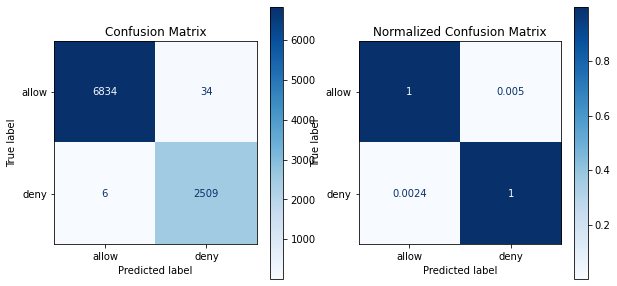

None


In [ ]:
from sklearn.svm import SVC
from sklearn import metrics as mt

svm_clf = SVC() 
print(svm_clf.get_params(deep=True))
print('='*100)

svm_clf.fit(X_train_scaled, y_train)
y_hat = svm_clf.predict(X_test_scaled) 

#view results
view_model_metrics(svm_clf, X_test_scaled, y_test, y_hat, y_classes)

### GridSearch Hypertuned SVM Model

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params: {'C': 100, 'degree': 3, 'gamma': 1, 'kernel': 'linear'}
Best estimator: SVC(C=100, gamma=1, kernel='linear')
Model Run Duration: 0:24:09.728833
Accuracy: 0.9996
Precision: 0.9996
Recall: 0.9999
F1: 0.9997


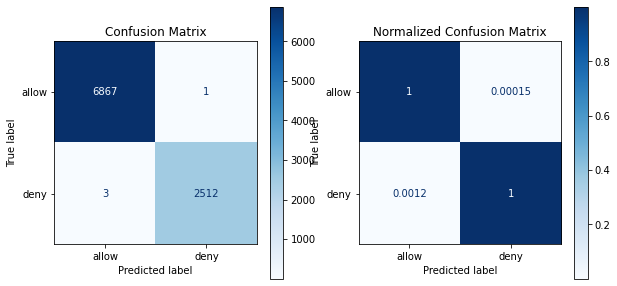

None


In [ ]:
start_time = datetime.now()
grid_params = {'kernel':('linear', 'rbf', 'sigmoid'), 
                'C':[.1, 1, 10, 100],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'degree': [3]
                }
############ For Testing only #############
# grid_params = {'kernel':['rbf'], 
#                 'C': [10],
#                 'gamma': [1],
#                 'degree': [3]
#                 }

svm = SVC()
svm_clf_grid  = GridSearchCV(svm, grid_params, refit=True, verbose=1, n_jobs = 1)
svm_clf_grid.fit(X_train_scaled, y_train)
print('Best params: '+str(svm_clf_grid.best_params_))
print('Best estimator: '+str(svm_clf_grid.best_estimator_))
end_time = datetime.now()
print('Model Run Duration: {}'.format(end_time - start_time))
print('='*100)

y_hat = svm_clf_grid.predict(X_test_scaled) 

view_model_metrics(svm_clf_grid.best_estimator_, X_test_scaled, y_test, y_hat, y_classes)

### Visualizing SVM Model

In [ ]:
# make a dataframe of the training data
df_tested_on =  df.iloc[train].copy()
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf_grid.best_estimator_.support_,:].copy()

# add back in the Response Variable Column to the pandas 
df_support['Action'] = y[svm_clf_grid.best_estimator_.support_,]
# also add it back in for the original data'
df['Action'] = y
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 1322 to 65161
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           181 non-null    int64 
 1   Destination Port      181 non-null    int64 
 2   NAT Source Port       181 non-null    int64 
 3   NAT Destination Port  181 non-null    int64 
 4   Bytes                 181 non-null    int64 
 5   Bytes Sent            181 non-null    int64 
 6   Bytes Received        181 non-null    int64 
 7   Packets               181 non-null    int64 
 8   Elapsed Time (sec)    181 non-null    int64 
 9   pkts_sent             181 non-null    int64 
 10  pkts_received         181 non-null    int64 
 11  Action                181 non-null    object
dtypes: int64(11), object(1)
memory usage: 18.4+ KB


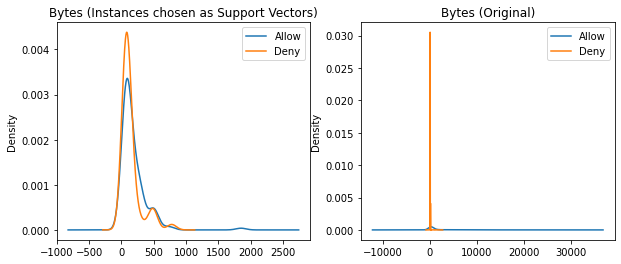

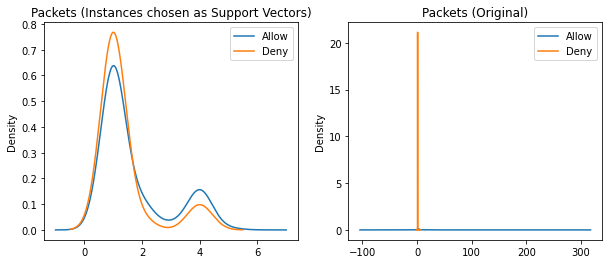

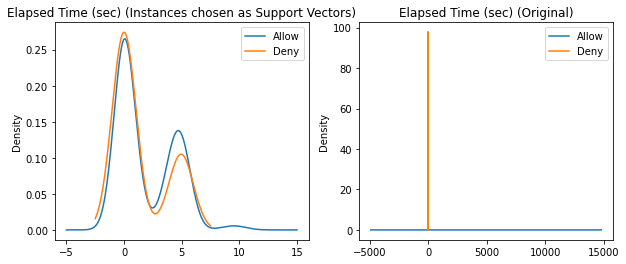

In [ ]:
# now lets see the statistics of these attributes
from matplotlib import pyplot as plt
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['Action'])
df_grouped = df.groupby(['Action'])

# plot KDE of Different variables
vars_to_plot = ['Bytes','Packets','Elapsed Time (sec)']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Allow','Deny'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Allow','Deny'])
    plt.title(v+' (Original)')



# Modeling SGD

### Barebone SGD Model

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Accuracy: 0.9996
Precision: 0.9996
Recall: 0.9999
F1: 0.9997


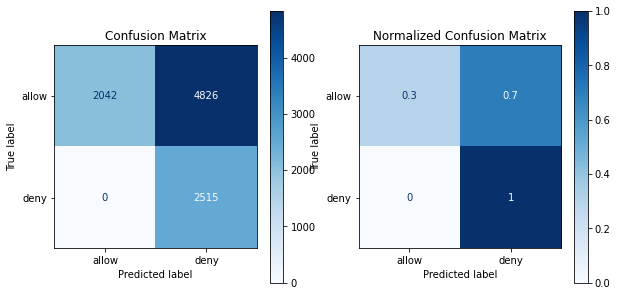

None


In [ ]:
from sklearn.linear_model import SGDClassifier

SGD_clf = SGDClassifier()
print(SGD_clf.get_params(deep=True))
print('='*100)

SGD_clf.fit(X_train, y_train)
y_hat_SGD = SGD_clf.predict(X_test_scaled)

view_model_metrics(SGD_clf, X_test_scaled, y_test, y_hat, y_classes)

#### Tuned SGD Model from PyCaret

{'alpha': 0.02, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.3, 'fit_intercept': True, 'l1_ratio': 0.3800000001, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': -1, 'penalty': 'l1', 'power_t': 0.5, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Accuracy: 0.9996
Precision: 0.9996
Recall: 0.9999
F1: 0.9997


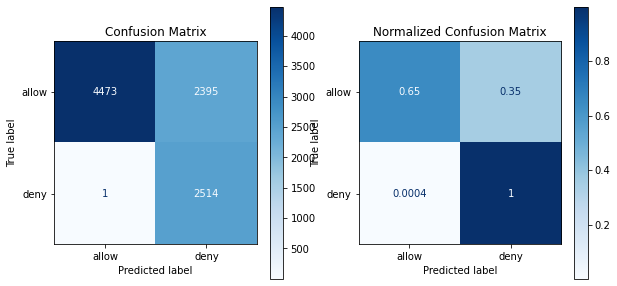

None


In [ ]:
pycaret_SGD_clf = SGDClassifier(alpha=0.02, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=True,
              l1_ratio=0.3800000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
print(pycaret_SGD_clf.get_params(deep=True))
print('='*100)

pycaret_SGD_clf.fit(X_train, y_train)
y_hat_SGD = pycaret_SGD_clf.predict(X_test_scaled)

view_model_metrics(pycaret_SGD_clf, X_test_scaled, y_test, y_hat, y_classes)